# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import norm
import numpy as np
from statsmodels.stats import weightstats as stests

In [3]:
df = pd.read_csv('human_body_temperature.csv')

In [4]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


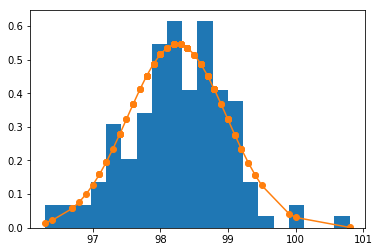

In [5]:
#Question 1 - Is the distribution of body temperatures normal?
#plot a histogram of the temperature data to visually see if it is normally distributed.
temp = df['temperature']
temp = temp.tolist() #need to convert to a list to sort the temperatures
temp.sort()

fit = stats.norm.pdf(temp, np.mean(temp), np.std(temp))  

plt.hist(temp,bins=20,normed=True) 
plt.plot(temp,fit,'-o')

plt.show()

In [6]:
#The plot looks fairly normally distributed. To check another way, we will use normaltest
stats.normaltest(df['temperature'])

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

The normaltest above returns the chi-squared statistic and the associated p-value. The null hypothesis is 'temperature' is normally distributed. The p-value represents the probability that a chi-squared statistic as large (or larger) as what what was returned would be seen. The smaller the p-value, the less-likely it is the data came from a normal distribution. The p-value above is not statistically significant, so we cannot reject the null hypothesis... meaning we can't say this isn't a normal distribution.

In [7]:
#Question 2 - Is the sample size large? Are the observations independent?
#Sample size
df.shape

(130, 3)

Yes the sample size is significantly large enough. Some definitions say anything larger than 31 is significantly large enough.

Yes the observations are independent. One temperature does not provide any information about the occurance of another.

In [8]:
#Question 3 - Is the true population mean really 98.6 degrees F? To decide, we look at three questions...

Would you use a one-sample or two-sample test? Why?
I will use a one-sample test because I am looking at one sample, and one mean within the sample. If I were looking at the difference in mean body temperature between the genders, I would use a two-sample test.

In this situation, is it appropriate to use the t or z statistic? Generally the z-statistic is used if you know the standard deviation and the sample size is over 30. The t-statistic is used if you do not know the population standard deviation and the sample size is less than 30. While our sample size is over 30, we do not know the standard deviation for the population, so I would choose the t-statistic.

In [9]:
#t-statistic - the null hypothesis is that 98.6 is the population mean.
stats.ttest_1samp(df['temperature'],98.6)

Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

The t-score of -5.45 tells us the sample mean is five and a half times as different from the expected population mean (98.6) as it is to values within the sample group. The p-value is very low and tells us the results have a .000000241% chance of happening by chance.

Now try using the other test. How is the result be different? Why?

In [10]:
#z-statistic
stests.ztest(df['temperature'],value=98.6)

(-5.4548232923645195, 4.9021570141012155e-08)

The z-statistic shows the same value as the t-statistic, but has a lower p-value. The p-value was very low for the t-test, but if it were not so low, the difference in the p-values could make quite a difference in interpreting how probable it was the results were by chance.

I would say it is unlikely the population mean is really 98.6 F. The sample mean was over five times as different from 98.6 F as it was from other values within the sample. This tells us there was not a lot of "noise" within the sample. The very low p-value tells us there is a .000000241% chance the sample values (and lack of "noise") was by chance.

In [11]:
#Question 4 - Draw a small sample of size 10 from the data and repeat both tests.
sampledf = df.sample(n=10)
sampledf

,temperature,gender,heart_rate
8,98.4,F,84.0
96,99.9,F,79.0
107,98.6,M,66.0
125,96.3,M,70.0
36,99.1,M,71.0
111,98.0,F,89.0
60,99.1,F,80.0
32,98.5,M,71.0
10,98.8,F,89.0
77,98.4,M,70.0


In [12]:
#t-statistic - the null hypothesis is that 98.6 is the population mean.
stats.ttest_1samp(sampledf['temperature'],98.6)

Ttest_1sampResult(statistic=-0.30398544240652159, pvalue=0.76804978087160991)

In [13]:
#z-statistic - the null hypothesis is that 98.6 is the population mean.
stests.ztest(sampledf['temperature'],value=98.6)

(-0.30398544240652159, 0.76113898195315777)

The correct test with 10 samples would be the t-test. T-tests are used when you do not know the population standard deviation and the sample size is less than 30. The t and z values are the same, but the p-values are different again. The p-value for the z-statistic is smaller, suggesting there is a smaller probability the results are due to chance. In this case, the p-value for the z-test is .01298, and the p-value for the t-test is .03474. If we had decided the p-value should be below 2%, we would come to different conclusions based on the test used.

In [17]:
#Question 5 - At what temperature should we consider someone's temperature to be "abnormal"?
#Compute the prediction interval using the sample mean and sample standard deviation.
#Prediction Interval
conf_int = stats.norm.interval(0.95, loc=np.mean(temp), scale=np.std(temp))
print('Prediction Interval:',conf_int)

#Margin of Error
perpointfunc = stats.norm.ppf(0.975) #percent point function - inverse of CDF
marg_err = perpointfunc * np.std(temp)
print('Margin of Error:', marg_err)


('Prediction Interval:', (96.81775582674824, 99.680705711713316))
('Margin of Error:', 1.4314749424825419)


Temperatures below 96.8F and above 99.6F would be considered abnormal. 95% of the time, our sample data is within this range.

In [26]:
#Question 6 - Is there a significant difference between males and females in normal temperature?

male = df[df['gender'] == 'M']
female = df[df['gender'] == 'F']

print('Mean Male Body Temp:',np.mean(male['temperature']))
print('Mean Female Body Temp:',np.mean(female['temperature']))

#2-sample t-test
stats.ttest_ind(male['temperature'],female['temperature'])

('Mean Male Body Temp:', 98.1046153846154)
('Mean Female Body Temp:', 98.39384615384613)


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

In [27]:
np.mean(female['temperature']-np.mean(male['temperature']))

0.2892307692307545

I looked at a two-sample t-test because I am comparing the means of two independent samples. The null hypothesis is  there is no significant difference between male and female normal body temperature. With a p-value of .0239, the null hypothesis can be rejected. The difference between male and female body temperature is considered significant, although it does not seem extreme. The mean male body temperature is 98.105 and the mean female body temperature is 98.394, a difference of .289 degrees.